In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
metadata = pd.read_csv("data/CA_baseline_metadata_and_annual_results.csv")

metadata.columns.tolist()

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_29462/1215710780.py:1: DtypeWarning: Columns (124) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("data/CA_baseline_metadata_and_annual_results.csv")


['bldg_id',
 'upgrade',
 'weight',
 'applicability',
 'in.sqft',
 'in.representative_income',
 'in.ahs_region',
 'in.aiannh_area',
 'in.area_median_income',
 'in.ashrae_iecc_climate_zone_2004',
 'in.ashrae_iecc_climate_zone_2004_2_a_split',
 'in.bathroom_spot_vent_hour',
 'in.battery',
 'in.bedrooms',
 'in.building_america_climate_zone',
 'in.cec_climate_zone',
 'in.ceiling_fan',
 'in.census_division',
 'in.census_division_recs',
 'in.census_region',
 'in.city',
 'in.clothes_dryer',
 'in.clothes_dryer_usage_level',
 'in.clothes_washer',
 'in.clothes_washer_presence',
 'in.clothes_washer_usage_level',
 'in.cooking_range',
 'in.cooking_range_usage_level',
 'in.cooling_setpoint',
 'in.cooling_setpoint_has_offset',
 'in.cooling_setpoint_offset_magnitude',
 'in.cooling_setpoint_offset_period',
 'in.corridor',
 'in.county',
 'in.county_and_puma',
 'in.county_name',
 'in.dehumidifier',
 'in.dishwasher',
 'in.dishwasher_usage_level',
 'in.door_area',
 'in.doors',
 'in.duct_leakage_and_insulati

In [4]:


# Define the base directory for the processed load profiles
BASE_OUTPUT_DIR = "data"

def plot_average_monthly_gas_load(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    # Load the data
    gas_data = pd.read_csv(file_path, parse_dates=['timestamp'])

    # Resample data to monthly totals for the average home
    monthly_avg_gas = gas_data.resample('M', on='timestamp')['average_load_therms'].sum()

    # Plot the average monthly gas load
    plt.figure(figsize=(10, 6))
    monthly_avg_gas.plot(kind='bar', color='skyblue')
    plt.title("Average Monthly Gas Load (Therms)\nSingle-Family Detached Home - Alameda County Average")
    plt.xlabel("Month")
    plt.ylabel("Gas Load (Therms)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


def plot_end_use_contributions(file_path, end_uses):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    gas_data = pd.read_csv(file_path, parse_dates=['timestamp'])

    monthly_end_uses = gas_data.resample('M', on='timestamp')[
        [f"{end_use}.therms.average" for end_use in end_uses]
    ].sum()

    monthly_end_uses.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 8),
        colormap="tab10",
    )
    plt.title("Monthly End-Use Contributions to Gas Load (Therms)\nAlameda County Single Family Detached Home")
    plt.xlabel("Month")
    plt.ylabel("Gas Load (Therms)")
    plt.legend(title="End Uses", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# Example usage:
file_path = "county_gas_totals_with_averages.csv"

# Plot the average monthly gas load
plot_average_monthly_gas_load(file_path)

# List of end uses in the dataset
end_uses = [
    "out.natural_gas.heating.energy_consumption",
    "out.natural_gas.hot_water.energy_consumption",
    "out.natural_gas.range_oven.energy_consumption",
    "out.natural_gas.clothes_dryer.energy_consumption",
    "out.natural_gas.fireplace.energy_consumption",
]

# Plot the contributions of each end use
plot_end_use_contributions(file_path, end_uses)

File not found: county_gas_totals_with_averages.csv
File not found: county_gas_totals_with_averages.csv


In [5]:
import pandas as pd

parquet_file_path = "/Users/ana/Documents/Berkeley/CCAI/cost-of-solar-storage/data/baseline/single-family-detached/san-francisco/buildings/7016-0.parquet"

df = pd.read_parquet(parquet_file_path)

column_names = df.columns

filtered_columns = [col for col in column_names if col.startswith("out.natural_gas")]

print(filtered_columns)

# csv_file_path = "/Users/ana/Documents/Berkeley/CCAI/cost-of-solar-storage/data/baseline/single-family-detached/san-francisco/buildings/7016-0.csv"

# df.to_csv(csv_file_path, index=False)

# print(f"Parquet file saved as CSV at: {csv_file_path}")

df.head()

['out.natural_gas.clothes_dryer.energy_consumption', 'out.natural_gas.clothes_dryer.energy_consumption_intensity', 'out.natural_gas.fireplace.energy_consumption', 'out.natural_gas.fireplace.energy_consumption_intensity', 'out.natural_gas.grill.energy_consumption', 'out.natural_gas.grill.energy_consumption_intensity', 'out.natural_gas.heating.energy_consumption', 'out.natural_gas.heating.energy_consumption_intensity', 'out.natural_gas.heating_hp_bkup.energy_consumption', 'out.natural_gas.heating_hp_bkup.energy_consumption_intensity', 'out.natural_gas.hot_water.energy_consumption', 'out.natural_gas.hot_water.energy_consumption_intensity', 'out.natural_gas.lighting.energy_consumption', 'out.natural_gas.lighting.energy_consumption_intensity', 'out.natural_gas.permanent_spa_heat.energy_consumption', 'out.natural_gas.permanent_spa_heat.energy_consumption_intensity', 'out.natural_gas.pool_heater.energy_consumption', 'out.natural_gas.pool_heater.energy_consumption_intensity', 'out.natural_gas.

,timestamp,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling.energy_consumption,out.electricity.cooling.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,...,out.total.lrmer_midcase_15__electricity.co2e_kg,out.total.lrmer_midcase_15__fuel_oil.co2e_kg,out.total.lrmer_midcase_15__natural_gas.co2e_kg,out.total.lrmer_midcase_15__propane.co2e_kg,out.total.lrmer_midcase_15.co2e_kg,out.total.lrmer_midcase_25__electricity.co2e_kg,out.total.lrmer_midcase_25__fuel_oil.co2e_kg,out.total.lrmer_midcase_25__natural_gas.co2e_kg,out.total.lrmer_midcase_25__propane.co2e_kg,out.total.lrmer_midcase_25.co2e_kg
bldg_id,,,,,,,,,,,,,,,,,,,,,
7016,2018-01-01 00:15:00,0.001,4.589261e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008156,0.0,0.218074,0.0,0.226229,0.005928,0.0,0.218074,0.0,0.224002
7016,2018-01-01 00:30:00,0.001,4.589261e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008659,0.0,0.149912,0.0,0.158571,0.006296,0.0,0.149912,0.0,0.156208
7016,2018-01-01 00:45:00,0.001,4.589261e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009240,0.0,0.184893,0.0,0.194133,0.006718,0.0,0.184893,0.0,0.191611
7016,2018-01-01 01:00:00,0.001,4.589261e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009811,0.0,0.219348,0.0,0.229159,0.007130,0.0,0.219348,0.0,0.226483
7016,2018-01-01 01:15:00,0.001,4.589261e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010446,0.0,0.230366,0.0,0.240812,0.007580,0.0,0.230366,0.0,0.237945


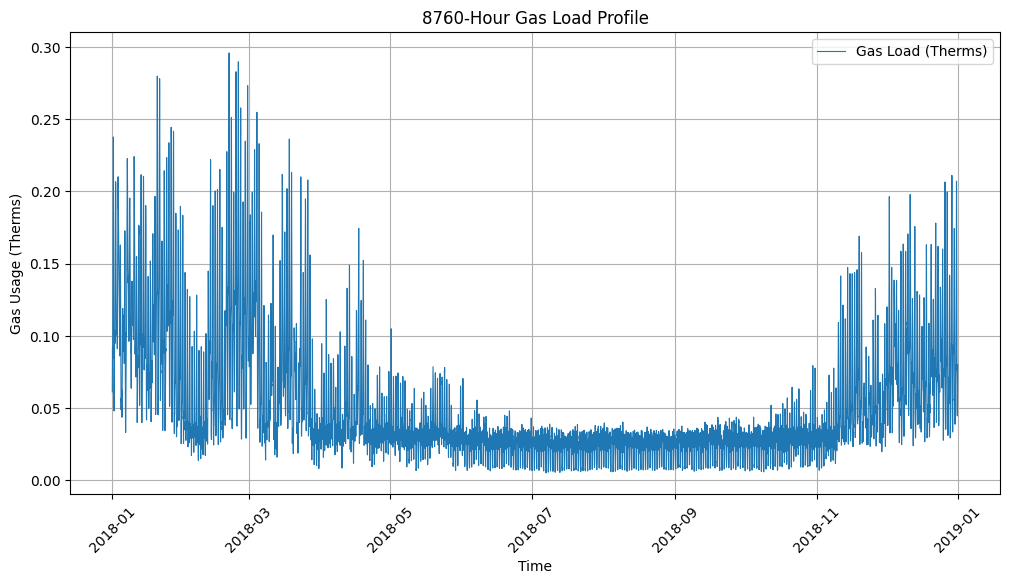

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "data/baseline/single-family-detached/alameda/combined_profiles_baseline_alameda.csv"
df = pd.read_csv(file_path, parse_dates=['timestamp'])

# Ensure the data is sorted by timestamp
df = df.sort_values(by='timestamp')

# Plot the gas load profile
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['gas.hourly_total.for_typical_county_home.therms'], label='Gas Load (Therms)', linewidth=0.8)

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Gas Usage (Therms)')
plt.title('8760-Hour Gas Load Profile')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()